#  1. Importações e dados
.

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set_theme()

In [3]:
# Carregando os dados
df = pd.read_csv('/home/fause/ML-Transportes/PBIC/acidentes_pbic_2020_2025_limpo.csv', encoding="utf-8")



/tmp/ipykernel_83469/3347538342.py:2: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/fause/ML-Transportes/PBIC/acidentes_pbic_2020_2025_limpo.csv', encoding="utf-8")


In [4]:
df = df.dropna(subset=['pesid'])


df.head()



,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,longitude,regional,delegacia,uop,ano_arquivo,mes,dia_mes,hora,gravidade_numerica,total_vitimas
0,260031.0,578988.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,"-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO,2020,1,1,1,2,1.0
1,260031.0,578987.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,"-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO,2020,1,1,1,2,1.0
2,260031.0,578991.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,"-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO,2020,1,1,1,2,1.0
3,260031.0,578986.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,"-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO,2020,1,1,1,2,1.0
4,260031.0,578475.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,"-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO,2020,1,1,1,2,1.0


# análise temporal

🚨 Horários mais perigosos:
   • 18:00h - 197,031 acidentes
   • 17:00h - 169,489 acidentes
   • 19:00h - 167,635 acidentes


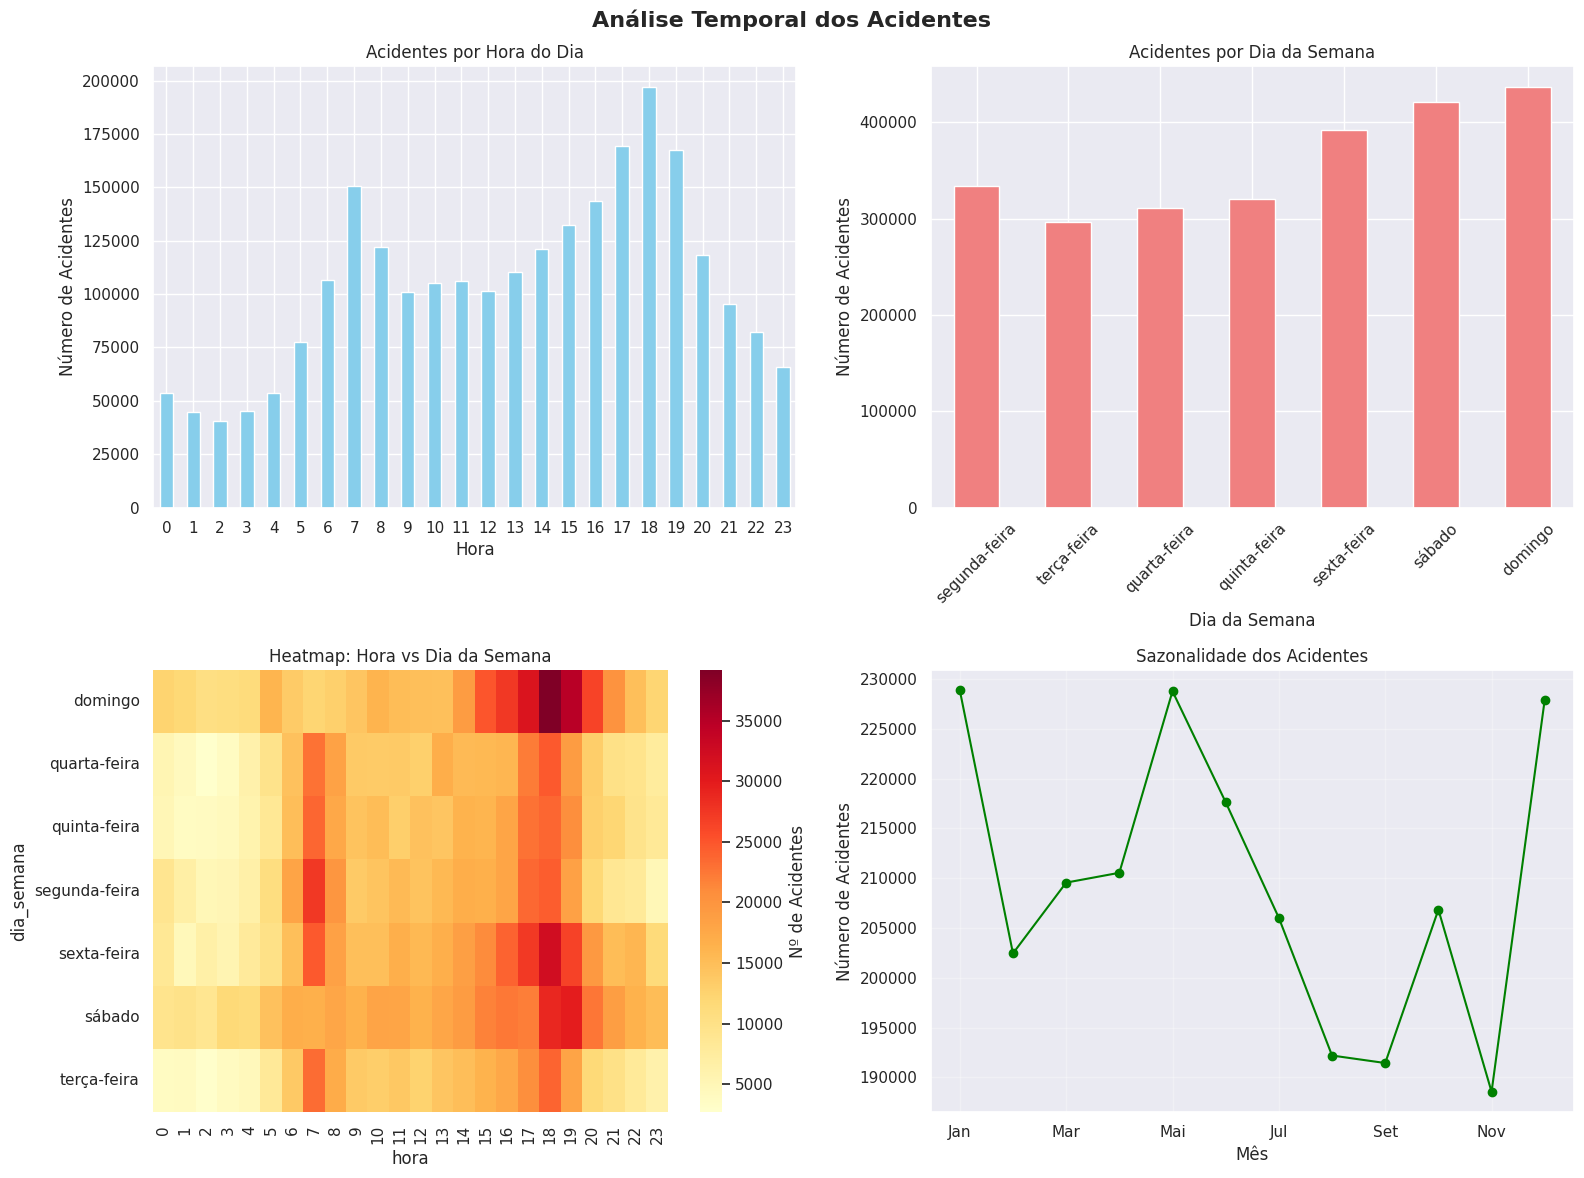

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análise Temporal dos Acidentes', fontsize=16, fontweight='bold')

# 1. Acidentes por hora
if 'hora' in df.columns:
    acidentes_hora = df.groupby('hora').size()
    acidentes_hora.plot(kind='bar', ax=axes[0,0], color='skyblue')
    axes[0,0].set_title('Acidentes por Hora do Dia')
    axes[0,0].set_xlabel('Hora')
    axes[0,0].set_ylabel('Número de Acidentes')
    axes[0,0].tick_params(axis='x', rotation=0)

    top_horas = acidentes_hora.nlargest(3)
    print("🚨 Horários mais perigosos:")
    for hora, qtd in top_horas.items():
        print(f"   • {hora:02d}:00h - {qtd:,} acidentes")

 #2. Acidentes por dia da semana
if 'dia_semana' in df.columns:
    acidentes_dia = df['dia_semana'].value_counts()
    ordem_dias = ['segunda-feira','terça-feira','quarta-feira','quinta-feira',
                  'sexta-feira','sábado','domingo']
    acidentes_dia = acidentes_dia.reindex([d for d in ordem_dias if d in acidentes_dia.index])

    acidentes_dia.plot(kind='bar', ax=axes[0,1], color='lightcoral')
    axes[0,1].set_title('Acidentes por Dia da Semana')
    axes[0,1].set_xlabel('Dia da Semana')
    axes[0,1].set_ylabel('Número de Acidentes')
    axes[0,1].tick_params(axis='x', rotation=45)

# 3. Heatmap hora vs dia da semana
if 'hora' in df.columns and 'dia_semana' in df.columns:
    heatmap_data = df.groupby(['dia_semana','hora']).size().unstack(fill_value=0)
    sns.heatmap(heatmap_data, ax=axes[1,0], cmap='YlOrRd', cbar_kws={'label':'Nº de Acidentes'})
    axes[1,0].set_title('Heatmap: Hora vs Dia da Semana')

# 4. Acidentes por mês
if 'mes' in df.columns:
    acidentes_mes = df['mes'].value_counts().sort_index()
    meses = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
    acidentes_mes.index = [meses[i-1] for i in acidentes_mes.index]

    acidentes_mes.plot(kind='line', ax=axes[1,1], marker='o', color='green')
    axes[1,1].set_title('Sazonalidade dos Acidentes')
    axes[1,1].set_xlabel('Mês')
    axes[1,1].set_ylabel('Número de Acidentes')
    axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Top BRs com mais acidentes


🚨 TOP 10 BRs COM MAIS ACIDENTES:
    1. BR-116.0: 360,126 acidentes
    2. BR-101.0: 329,383 acidentes
    3. BR-40.0: 119,870 acidentes
    4. BR-381.0: 116,488 acidentes
    5. BR-163.0: 103,449 acidentes
    6. BR-364.0: 102,761 acidentes
    7. BR-153.0: 100,878 acidentes
    8. BR-277.0: 82,710 acidentes
    9. BR-230.0: 74,697 acidentes
   10. BR-376.0: 63,968 acidentes

🚨 TOP 10 TRECHOS MAIS PERIGOSOS:
   593. BR-116.0 (Km 220-230): 15,767.0 acidentes
   592. BR-116.0 (Km 210-220): 12,788.0 acidentes
   423. BR-101.0 (Km 80-90): 10,389.0 acidentes
   582. BR-116.0 (Km 110-120): 8,891.0 acidentes
   435. BR-101.0 (Km 200-210): 8,746.0 acidentes
   419. BR-101.0 (Km 40-50): 8,569.0 acidentes
   571. BR-116.0 (Km 0-10): 8,516.0 acidentes
   598. BR-116.0 (Km 270-280): 8,332.0 acidentes
   421. BR-101.0 (Km 60-70): 7,906.0 acidentes
   595. BR-116.0 (Km 240-250): 7,527.0 acidentes


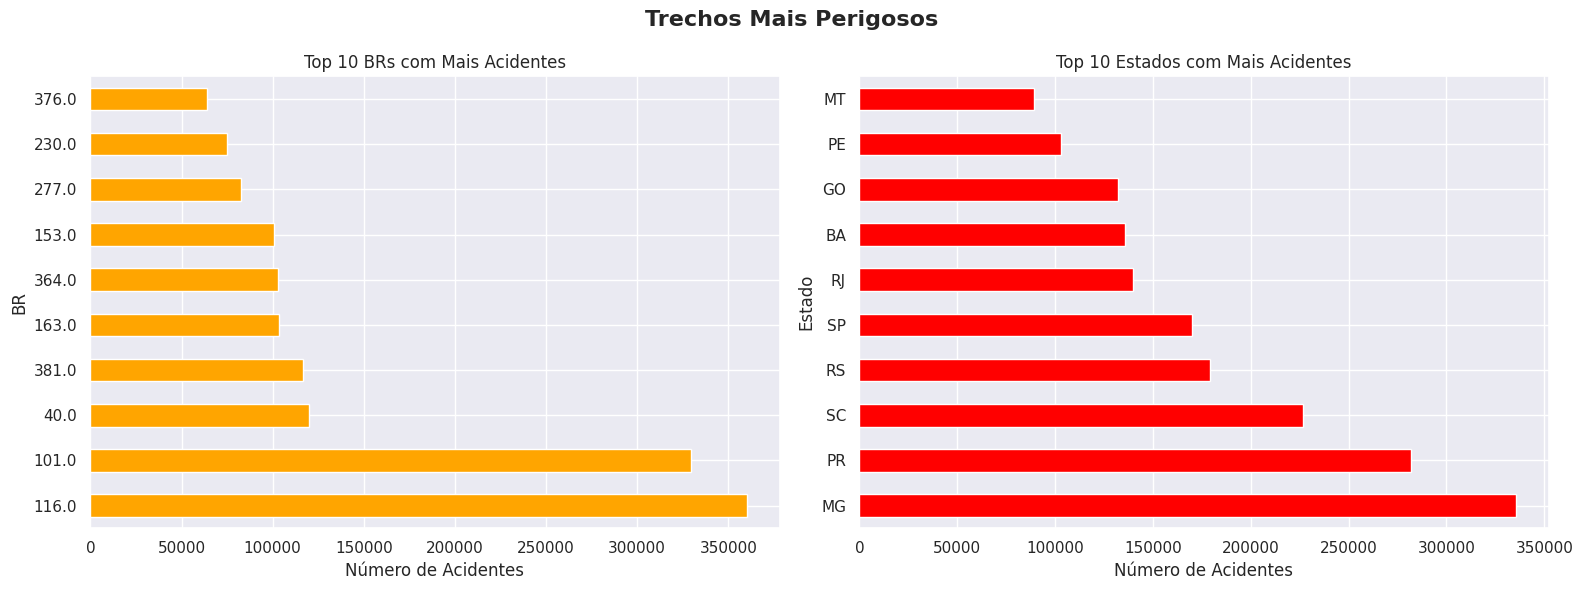

In [6]:
# Converte a coluna 'km' para numérico (forçando erros para NaN)
if 'km' in df.columns:
    df['km'] = pd.to_numeric(df['km'], errors='coerce')

# Top BRs com mais acidentes
if 'br' in df.columns:
    acidentes_br = df['br'].value_counts().head(10)
    print("\n🚨 TOP 10 BRs COM MAIS ACIDENTES:")
    for i, (br, qtd) in enumerate(acidentes_br.items(), 1):
        print(f"   {i:2d}. BR-{br}: {qtd:,} acidentes")

# Top trechos perigosos (BR + faixa de 10 km)
if 'br' in df.columns and 'km' in df.columns:
    # Remove linhas onde 'km' é NaN
    df_km_validos = df.dropna(subset=['km']).copy()
    
    # Cria a faixa de 10 km
    df_km_validos['km_faixa'] = (df_km_validos['km'] // 10) * 10
    trechos_perigosos = df_km_validos.groupby(['br', 'km_faixa']).size().reset_index(name='acidentes')
    trechos_perigosos = trechos_perigosos.nlargest(10, 'acidentes')

    print(f"\n🚨 TOP 10 TRECHOS MAIS PERIGOSOS:")
    for i, row in trechos_perigosos.iterrows():
        br = row['br']
        km_inicio = row['km_faixa']
        km_fim = km_inicio + 10
        acidentes = row['acidentes']
        print(f"   {i+1:2d}. BR-{br} (Km {km_inicio:.0f}-{km_fim:.0f}): {acidentes:,} acidentes")

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Trechos Mais Perigosos', fontsize=16, fontweight='bold')

if 'br' in df.columns:
    acidentes_br.plot(kind='barh', ax=axes[0], color='orange')
    axes[0].set_title('Top 10 BRs com Mais Acidentes')
    axes[0].set_xlabel('Número de Acidentes')
    axes[0].set_ylabel('BR')

if 'uf' in df.columns:
    acidentes_uf = df['uf'].value_counts().head(10)
    acidentes_uf.plot(kind='barh', ax=axes[1], color='red')
    axes[1].set_title('Top 10 Estados com Mais Acidentes')
    axes[1].set_xlabel('Número de Acidentes')
    axes[1].set_ylabel('Estado')

plt.tight_layout()
plt.show()


#  Análise de Condições Fatais
Analisa condições que levam a acidentes fatais.


📊 ESTATÍSTICAS GERAIS:
   • Total de acidentes: 2,510,785
   • Acidentes fatais: 131,563
   • Taxa de fatalidade: 5.24%

🚨 HORÁRIOS COM MAIOR TAXA DE FATALIDADE:
   • 03:00h - 10.4% de fatalidade
   • 04:00h - 8.5% de fatalidade
   • 02:00h - 8.4% de fatalidade


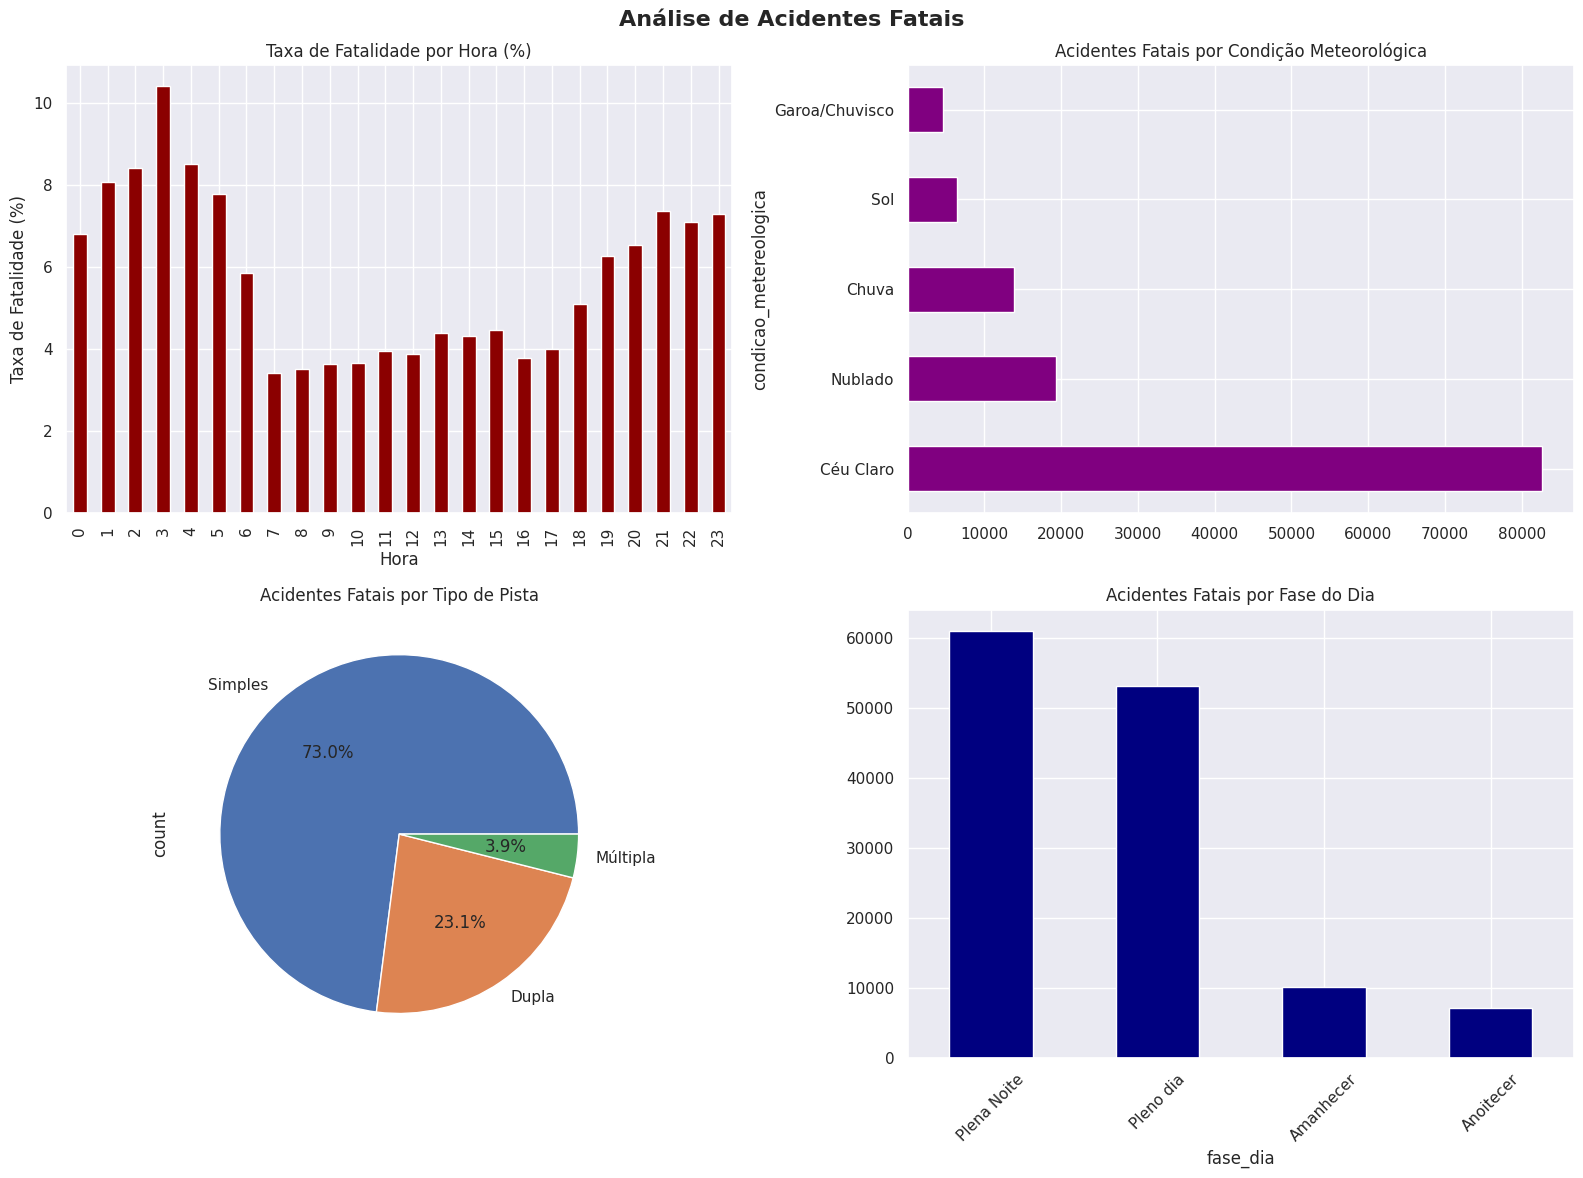

In [7]:
acidentes_fatais = df[df['mortos'] > 0] if 'mortos' in df.columns else pd.DataFrame()

if len(acidentes_fatais) == 0:
    print("❌ Não foi possível identificar acidentes fatais nos dados")
else:
    total_acidentes = len(df)
    total_fatais = len(acidentes_fatais)
    taxa_fatalidade = (total_fatais / total_acidentes) * 100

    print(f"\n📊 ESTATÍSTICAS GERAIS:")
    print(f"   • Total de acidentes: {total_acidentes:,}")
    print(f"   • Acidentes fatais: {total_fatais:,}")
    print(f"   • Taxa de fatalidade: {taxa_fatalidade:.2f}%")

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Análise de Acidentes Fatais', fontsize=16, fontweight='bold')

    # Fatalidade por hora
    if 'hora' in df.columns:
        fatais_hora = acidentes_fatais.groupby('hora').size()
        total_hora = df.groupby('hora').size()
        taxa_hora = (fatais_hora / total_hora * 100).fillna(0)

        taxa_hora.plot(kind='bar', ax=axes[0,0], color='darkred')
        axes[0,0].set_title('Taxa de Fatalidade por Hora (%)')
        axes[0,0].set_xlabel('Hora')
        axes[0,0].set_ylabel('Taxa de Fatalidade (%)')

        top_fatais_hora = taxa_hora.nlargest(3)
        print(f"\n🚨 HORÁRIOS COM MAIOR TAXA DE FATALIDADE:")
        for hora, taxa in top_fatais_hora.items():
            print(f"   • {hora:02d}:00h - {taxa:.1f}% de fatalidade")

    # Fatalidade por condição meteorológica
    if 'condicao_metereologica' in df.columns:
        fatais_clima = acidentes_fatais['condicao_metereologica'].value_counts().head(5)
        fatais_clima.plot(kind='barh', ax=axes[0,1], color='purple')
        axes[0,1].set_title('Acidentes Fatais por Condição Meteorológica')

    # Fatalidade por tipo de pista
    if 'tipo_pista' in df.columns:
        fatais_pista = acidentes_fatais['tipo_pista'].value_counts().head(5)
        fatais_pista.plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%')
        axes[1,0].set_title('Acidentes Fatais por Tipo de Pista')

    # Fatalidade por fase do dia
    if 'fase_dia' in df.columns:
        fatais_fase = acidentes_fatais['fase_dia'].value_counts()
        fatais_fase.plot(kind='bar', ax=axes[1,1], color='navy')
        axes[1,1].set_title('Acidentes Fatais por Fase do Dia')
        axes[1,1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


In [9]:
print(df['uso_solo'].unique())



['Não' 'Sim']
